# Gridworld as Finite MDP

## Policies and Value Functions
Figure 3.2 (left) shows a rectangular (square) gridworld representation of a simple finite MDP.
- The cells of the grid correspond to the states of the environment.
- At each cell, 4 actions are possible: north (up), south (down), east (right), and west (left), which deterministically cause the agent to move 1 cell in the respective direction on the grid.
- Actions that would take the agent off the grid leave its location unchanged, but also result in a reward of -1.
- Other actions result in a reward of 0, except those that move the agent out of the special states A and B.
    - From state A, all 4 actions yield a reward of +10 and take the agent to A'.
    - From state B, all 4 actions yield a reward of +5 and take the agent to B'.

In [1]:
from IPython.display import Image

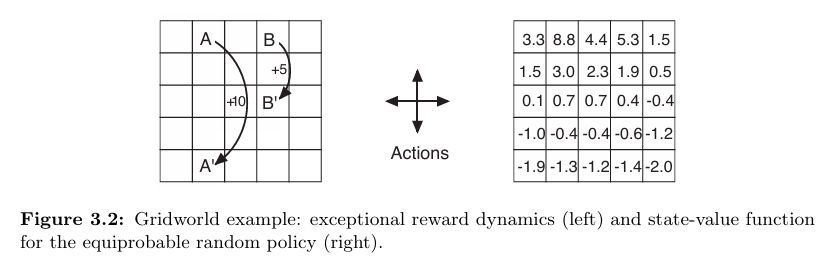

In [2]:
Image(filename="../book_images/Figure_3_2.PNG")

In [3]:
# Suppose the agent selects all 4 actions with equal probability in all states => the probability of each action will be 1/4.
action_probability = 0.25

# Discount rate (denoted as 0 ≤ 𝛾 ≤ 1)
discount = 0.9

Figure 3.2 (right) shows the value function, $v_{\pi}$, for this policy, for the discounted reward case with $\gamma$ = 0.9. This VF was computed by solving the system of linear equations (3.14), i.e. Bellman equation for $v_{\pi}$.
- Notice the negative values near the lower edge; these are the result of the high probability of hitting the edge of the grid there under the random policy.
- State A is the best state to be in under this policy.
- Note that A’s expected return is less than its immediate reward of 10, because from A state the agent is taken to state A' from which it is likely to run into the edge of the grid.
- State B, on the other hand, is valued more than its immediate reward of 5, because from B the agent is taken to B' which has a positive value.
- From B' the expected penalty (negative reward) for possibly running into an edge is more than compensated for by the expected gain for possibly stumbling onto A or B.

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from src.grid_world import grid_size, actions, step, draw

matplotlib.use('Agg')

In [5]:
# State-value function table
state_values=np.zeros((grid_size,grid_size))

# Iterate until value convergence
while True:
    # New values of state-value function table
    new_values=np.zeros_like(state_values)
    
    for i in range(grid_size):
        for j in range(grid_size):
            for action in actions:
                # Get the current state
                state = [i,j]
                
                # Get the next state and reward
                nest_state,reward=step(state,action)
                
                # Bellman equation for 𝑣_𝜋
                new_values[i,j] +=action_probability*(reward+discount*state_values[nest_state[0],nest_state[1]])
    
    # Check value convergence
    if np.sum(np.abs(state_values - new_values)) < 1e-4:
        draw(grid=np.round(new_values, decimals=2))
        plt.savefig("../generated_images/figure_3_2.png")
        plt.close()
        break
    
    state_values = new_values

## Optimal Policies and Optimal Value Functions
Suppose we solve the Bellman equation for $v_{*}$ for the simple grid task shown in Figure 3.5 (left).
- Figure 3.5 (middle) shows the optimal value function.
- Figure 3.5 (right) shows the corresponding optimal policies.
- Where there are multiple arrows in a cell, all the corresponding actions are optimal.

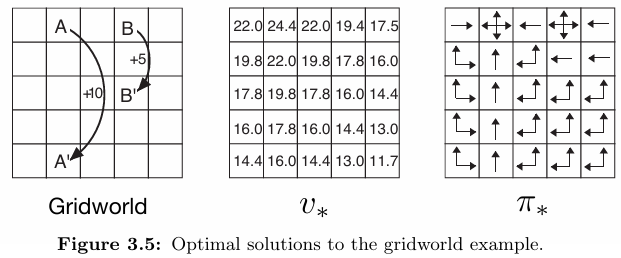

In [7]:
Image(filename="../book_images/Figure_3_5.PNG")

In [6]:
# State-value function table
state_values=np.zeros((grid_size,grid_size))

# Iterate until value convergence
while True:
    # New values of state-value function table
    new_values=np.zeros_like(state_values)
    
    for i in range(grid_size):
        for j in range(grid_size):
            # Create an empty list of state-values
            values=[]
            
            for action in actions:
                # Get the current state
                state=[i,j]
                
                # Get the next state and reward
                next_state,reward=step(state,action)
                
                # Bellman equation for 𝒗_∗ or Bellman optimality equation
                values.append(reward+discount*state_values[next_state[0],next_state[1]])
            
            # Intuitively, the Bellman optimality equation expresses the fact that the value of a state under an optimal policy
            # must equal the expected return for the best action from that state:
            new_values[i,j] =np.max(values)
    
    # Check value convergence
    if np.sum(np.abs(new_values - state_values)) < 1e-4:
        draw(grid=np.round(new_values, decimals=2))
        plt.savefig("../generated_images/figure_3_5.png")
        plt.close()
        
        draw(grid=new_values, is_policy=True)
        plt.savefig("../generated_images/figure_3_5_policy.png")
        plt.close()
        break
    
    state_values = new_values